In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [5]:
df['credit.policy'].unique()

array([1, 0], dtype=int64)

In [6]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [7]:
pur=pd.get_dummies(df['purpose'], drop_first=True)

In [8]:
df.drop('purpose', axis=1, inplace=True)

In [9]:
df=pd.concat([pur, df], axis=1)

In [10]:
df.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,0,0,0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0,0,0,0,0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,0,1,0,0,0,0,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,0,1,0,0,0,0,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0,0,0,0,0,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df.corr()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit_card,1.000000,-0.326850,-0.075076,-0.103279,-0.085176,-0.102397,0.003216,-0.042109,0.000774,0.072942,0.084476,-0.012512,0.046220,0.072316,0.091321,-0.033640,-0.008817,0.014842,-0.047136
debt_consolidation,-0.326850,1.000000,-0.161698,-0.222441,-0.183451,-0.220542,0.020193,0.123607,0.161658,-0.026214,0.179149,-0.154132,-0.009318,0.005785,0.211869,-0.044240,-0.000697,0.026845,-0.017543
educational,-0.075076,-0.161698,1.000000,-0.051094,-0.042138,-0.050658,-0.031346,-0.019618,-0.094510,-0.119799,-0.035325,-0.013012,-0.042621,-0.034743,-0.053128,0.024243,-0.002214,-0.013521,0.021609
home_improvement,-0.103279,-0.222441,-0.051094,1.000000,-0.057967,-0.069687,0.006036,-0.050697,0.023024,0.116375,-0.092788,0.097474,0.068087,0.003258,-0.114449,0.043827,-0.013098,0.004704,0.007272
major_purchase,-0.085176,-0.183451,-0.042138,-0.057967,1.000000,-0.057472,0.024281,-0.068978,-0.079836,-0.031020,-0.077719,0.067129,-0.020561,-0.062395,-0.108079,-0.001445,0.004085,-0.011734,-0.028580
small_business,-0.102397,-0.220542,-0.050658,-0.069687,-0.057472,1.000000,-0.003511,0.151247,0.145654,0.091540,-0.069245,0.063292,0.034883,0.083069,-0.060962,0.042567,-0.004148,-0.005595,0.084460
credit.policy,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439


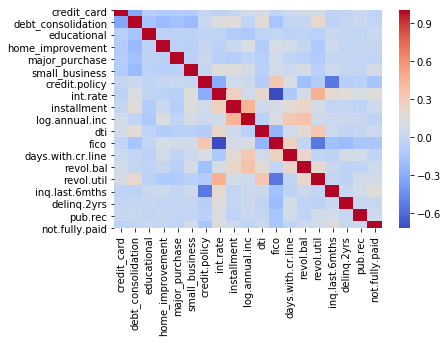

In [12]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [13]:
df.drop(['home_improvement','delinq.2yrs'], axis=1, inplace=True)

In [14]:
df.head()

,credit_card,debt_consolidation,educational,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,0,1,0,0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0,0,0,0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,0,1,0,0,0,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,0,1,0,0,0,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0,0,0,0,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,0


In [15]:
df.corr()

,credit_card,debt_consolidation,educational,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
credit_card,1.000000,-0.326850,-0.075076,-0.085176,-0.102397,0.003216,-0.042109,0.000774,0.072942,0.084476,-0.012512,0.046220,0.072316,0.091321,-0.033640,0.014842,-0.047136
debt_consolidation,-0.326850,1.000000,-0.161698,-0.183451,-0.220542,0.020193,0.123607,0.161658,-0.026214,0.179149,-0.154132,-0.009318,0.005785,0.211869,-0.044240,0.026845,-0.017543
educational,-0.075076,-0.161698,1.000000,-0.042138,-0.050658,-0.031346,-0.019618,-0.094510,-0.119799,-0.035325,-0.013012,-0.042621,-0.034743,-0.053128,0.024243,-0.013521,0.021609
major_purchase,-0.085176,-0.183451,-0.042138,1.000000,-0.057472,0.024281,-0.068978,-0.079836,-0.031020,-0.077719,0.067129,-0.020561,-0.062395,-0.108079,-0.001445,-0.011734,-0.028580
small_business,-0.102397,-0.220542,-0.050658,-0.057472,1.000000,-0.003511,0.151247,0.145654,0.091540,-0.069245,0.063292,0.034883,0.083069,-0.060962,0.042567,-0.005595,0.084460
credit.policy,0.003216,0.020193,-0.031346,0.024281,-0.003511,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.054243,-0.158119
int.rate,-0.042109,0.123607,-0.019618,-0.068978,0.151247,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.098162,0.159552
installment,0.000774,0.161658,-0.094510,-0.079836,0.145654,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.032760,0.049955
log.annual.inc,0.072942,-0.026214,-0.119799,-0.031020,0.091540,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.016506,-0.033439
dti,0.084476,0.179149,-0.035325,-0.077719,-0.069245,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,0.006209,0.037362


In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df.drop('not.fully.paid', axis=1))
scaled_array = ss.transform(df.drop('not.fully.paid', axis =1))

In [17]:
x=pd.DataFrame(data=scaled_array, columns=df.columns[:-1])
y=df['not.fully.paid']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [20]:
from sklearn.tree  import DecisionTreeClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
m2=DecisionTreeClassifier()
m2.fit(x_train, y_train)
ypred=m2.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
confusion_matrix(y_test,ypred)

array([[2015,  401],
       [ 345,  113]], dtype=int64)

In [25]:
accuracy_score(y_test,ypred)

0.7404314544189283

In [26]:
m3=RandomForestClassifier()
m3.fit(x_train, y_train)
ypred=m3.predict(x_test)

C:\Users\Pranav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
confusion_matrix(y_test,ypred)

array([[2365,   51],
       [ 432,   26]], dtype=int64)

In [28]:
accuracy_score(y_test,ypred)

0.8319415448851775